# DATA ANALYSSI & VISULIZATION PROJECT(CUCS1018) 

##### SUBHSIS SAHOO (240720100122), SURYANARAYANA SHOO(240720100143), PRATIK KUMAR NAYAK(24020100158), ASUTOSH DEHURY(240720100135)

### PIZZA SHOP ANALYSIS & VISUZALIZATION

##### 1.Manageing the sells Order
##### 2.Collecting Data
##### 3.Analysis and Visulazation Data

### 1. Manageing The sells Ordder

##### In this project, we study the data which is a csv file format useing various Python libriarys like Pandas, matplotlib and numpy. we study different colloumn of deta set and try to corelate with the other coloumn parameter to find relation between them. We try to find out and analyze those key factors like weekly selling of pizza , which day the pizza is sell most, top 5 types of pizza is sell, size of pizza is sell most and the most profitable combination between the size, pyza type and price to help the business in efficent way.

### 2. Collecting Data 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/pizza.csv'
pizza_data = pd.read_csv("pizza_sell.csv")

# Convert order_date to datetime
pizza_data['order_date'] = pd.to_datetime(pizza_data['order_date'], format='%d-%m-%Y')


### 3. Analysis and Visulazation Data

In [10]:
pizza_data.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2024-10-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2024-10-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,2024-10-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,2024-10-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,2024-10-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,2024-10-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,2024-10-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,2024-10-02,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,2024-10-02,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,2024-10-02,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


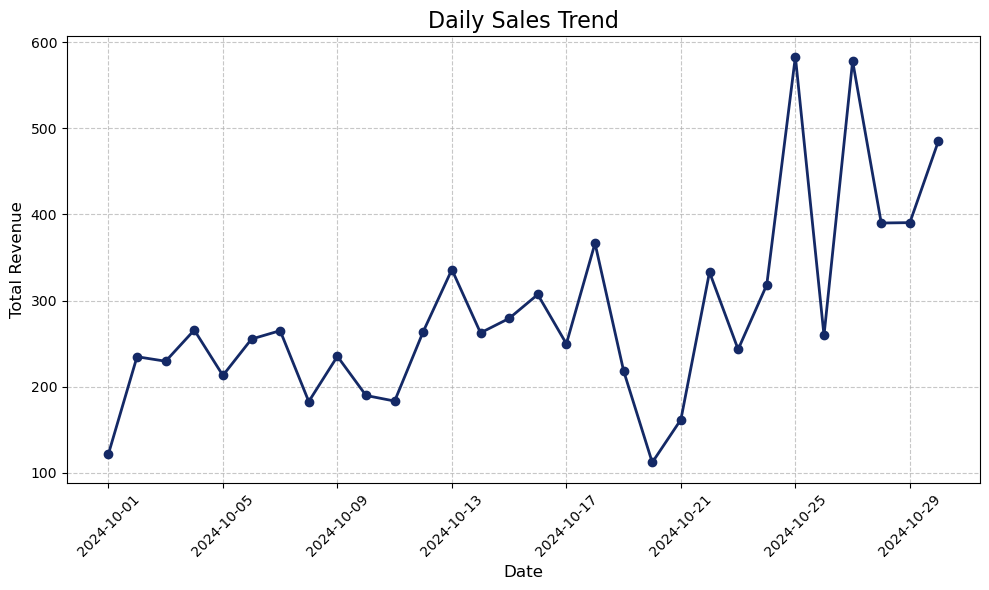

In [11]:
# Calculate total sales per day
daily_sales = pizza_data.groupby('order_date')['total_price'].sum()

# Plot the daily sales as a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='#142966', linestyle='-', linewidth=2)

# Add titles and labels
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()


In [12]:
# Calculate total revenue
total_revenue = pizza_data['total_price'].sum()

# Find the most popular pizza by quantity sold
most_popular_pizza = pizza_data.groupby('pizza_name')['quantity'].sum().idxmax()

# Find the top-performing pizza category by total revenue
top_category = pizza_data.groupby('pizza_category')['total_price'].sum().idxmax()

# Print results
print("Total Revenue:", total_revenue)
print("Most Popular Pizza:", most_popular_pizza)
print("Top-Performing Category:", top_category)


Total Revenue: 8513.85
Most Popular Pizza: The Barbecue Chicken Pizza
Top-Performing Category: Classic


In [13]:
# Extract day of the week from the order date
pizza_data['day_of_week'] = pizza_data['order_date'].dt.day_name()

# Calculate total sales by day of the week
sales_by_day = pizza_data.groupby('day_of_week')['total_price'].sum().sort_values()

# Print sales by day of the week
print("\nSales by Day of the Week:\n", sales_by_day)



Sales by Day of the Week:
 day_of_week
Saturday      954.70
Thursday      987.20
Monday       1079.15
Sunday       1281.35
Tuesday      1307.15
Friday       1398.65
Wednesday    1505.65
Name: total_price, dtype: float64


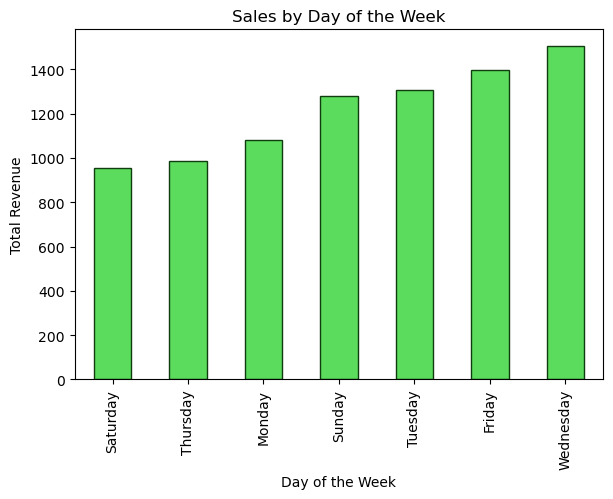

In [14]:
plt.figure(figsize=(15, 10))

# Sales by Day of the Week
plt.subplot(2, 2, 1)
sales_by_day.plot(kind='bar', color='#5CDC5C', edgecolor='#0f3d0f')
plt.title('Sales by Day of the Week')
plt.ylabel('Total Revenue')
plt.xlabel('Day of the Week')

plt.show()

In [15]:
# Calculate average price by pizza size
average_price_by_size = pizza_data.groupby('pizza_size')['unit_price'].mean()

# Get the distribution of orders by pizza size
size_distribution = pizza_data['pizza_size'].value_counts()

# Print insights
print("\nAverage Price by Pizza Size:\n", average_price_by_size)
print("\nPizza Size Distribution:\n", size_distribution)



Average Price by Pizza Size:
 pizza_size
L     19.866129
M     15.894643
S     12.070438
XL    25.500000
Name: unit_price, dtype: float64

Pizza Size Distribution:
 pizza_size
L     217
M     140
S     137
XL      6
Name: count, dtype: int64


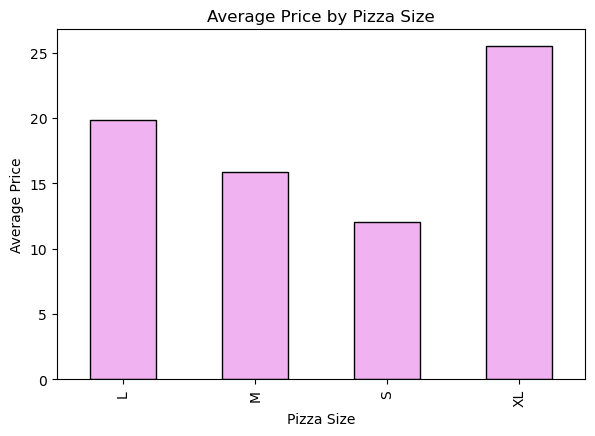

In [16]:
plt.figure(figsize=(15, 10))

# Average Price by Pizza Size
plt.subplot(2, 2, 2)
average_price_by_size.plot(kind='bar', color='#F0B2F0', edgecolor='black')
plt.title('Average Price by Pizza Size')
plt.ylabel('Average Price')
plt.xlabel('Pizza Size')

plt.show()

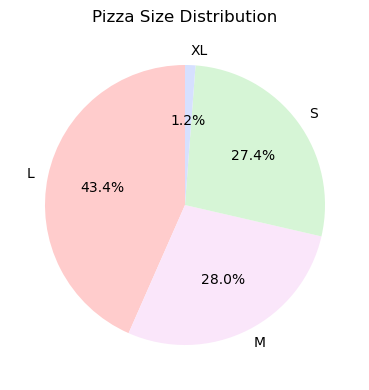

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
size_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ffcccc', '#fae6fa', '#d6f5d6', '#d6e0ff'])
plt.title('Pizza Size Distribution')
plt.ylabel('')

plt.show()

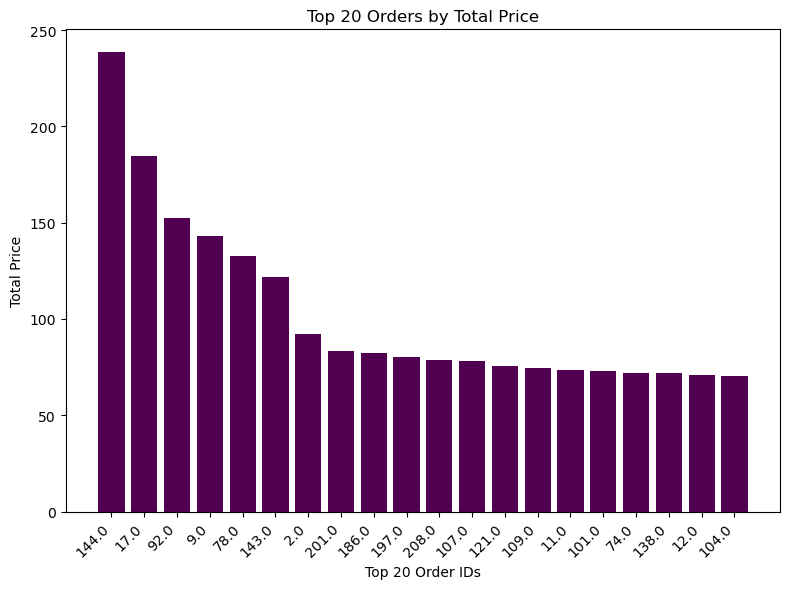

In [18]:
order_total_prices = pizza_data.groupby('order_id')['total_price'].sum().reset_index()

top_20_orders = order_total_prices.sort_values(by='total_price', ascending=False).head(20)

top_20_orders['order_id'] = top_20_orders['order_id'].astype(str)

plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_orders)))  
plt.bar(top_20_orders['order_id'], top_20_orders['total_price'], color='#520052')
plt.title('Top 20 Orders by Total Price')
plt.xlabel('Top 20 Order IDs')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

# Show the plot
plt.show()